In [18]:
import os
import torch

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

from models import ShallowNN
from utils import load_file,evaluate

features = 197
batch_size = 64
loss_fn = torch.nn.MSELoss()

In [19]:
client_ids = ["0_0","0_1","0_2","0_3","0_4","0_5","1_0","1_1","1_2","1_3","1_4","1_5","2_0","2_1","2_2","2_3","2_4","2_5","3_0","3_1","3_2","3_3","3_4","3_5"]

In [20]:
fed_learning_all_losses = pd.read_csv("losses/fed_learning_stats_64.csv")

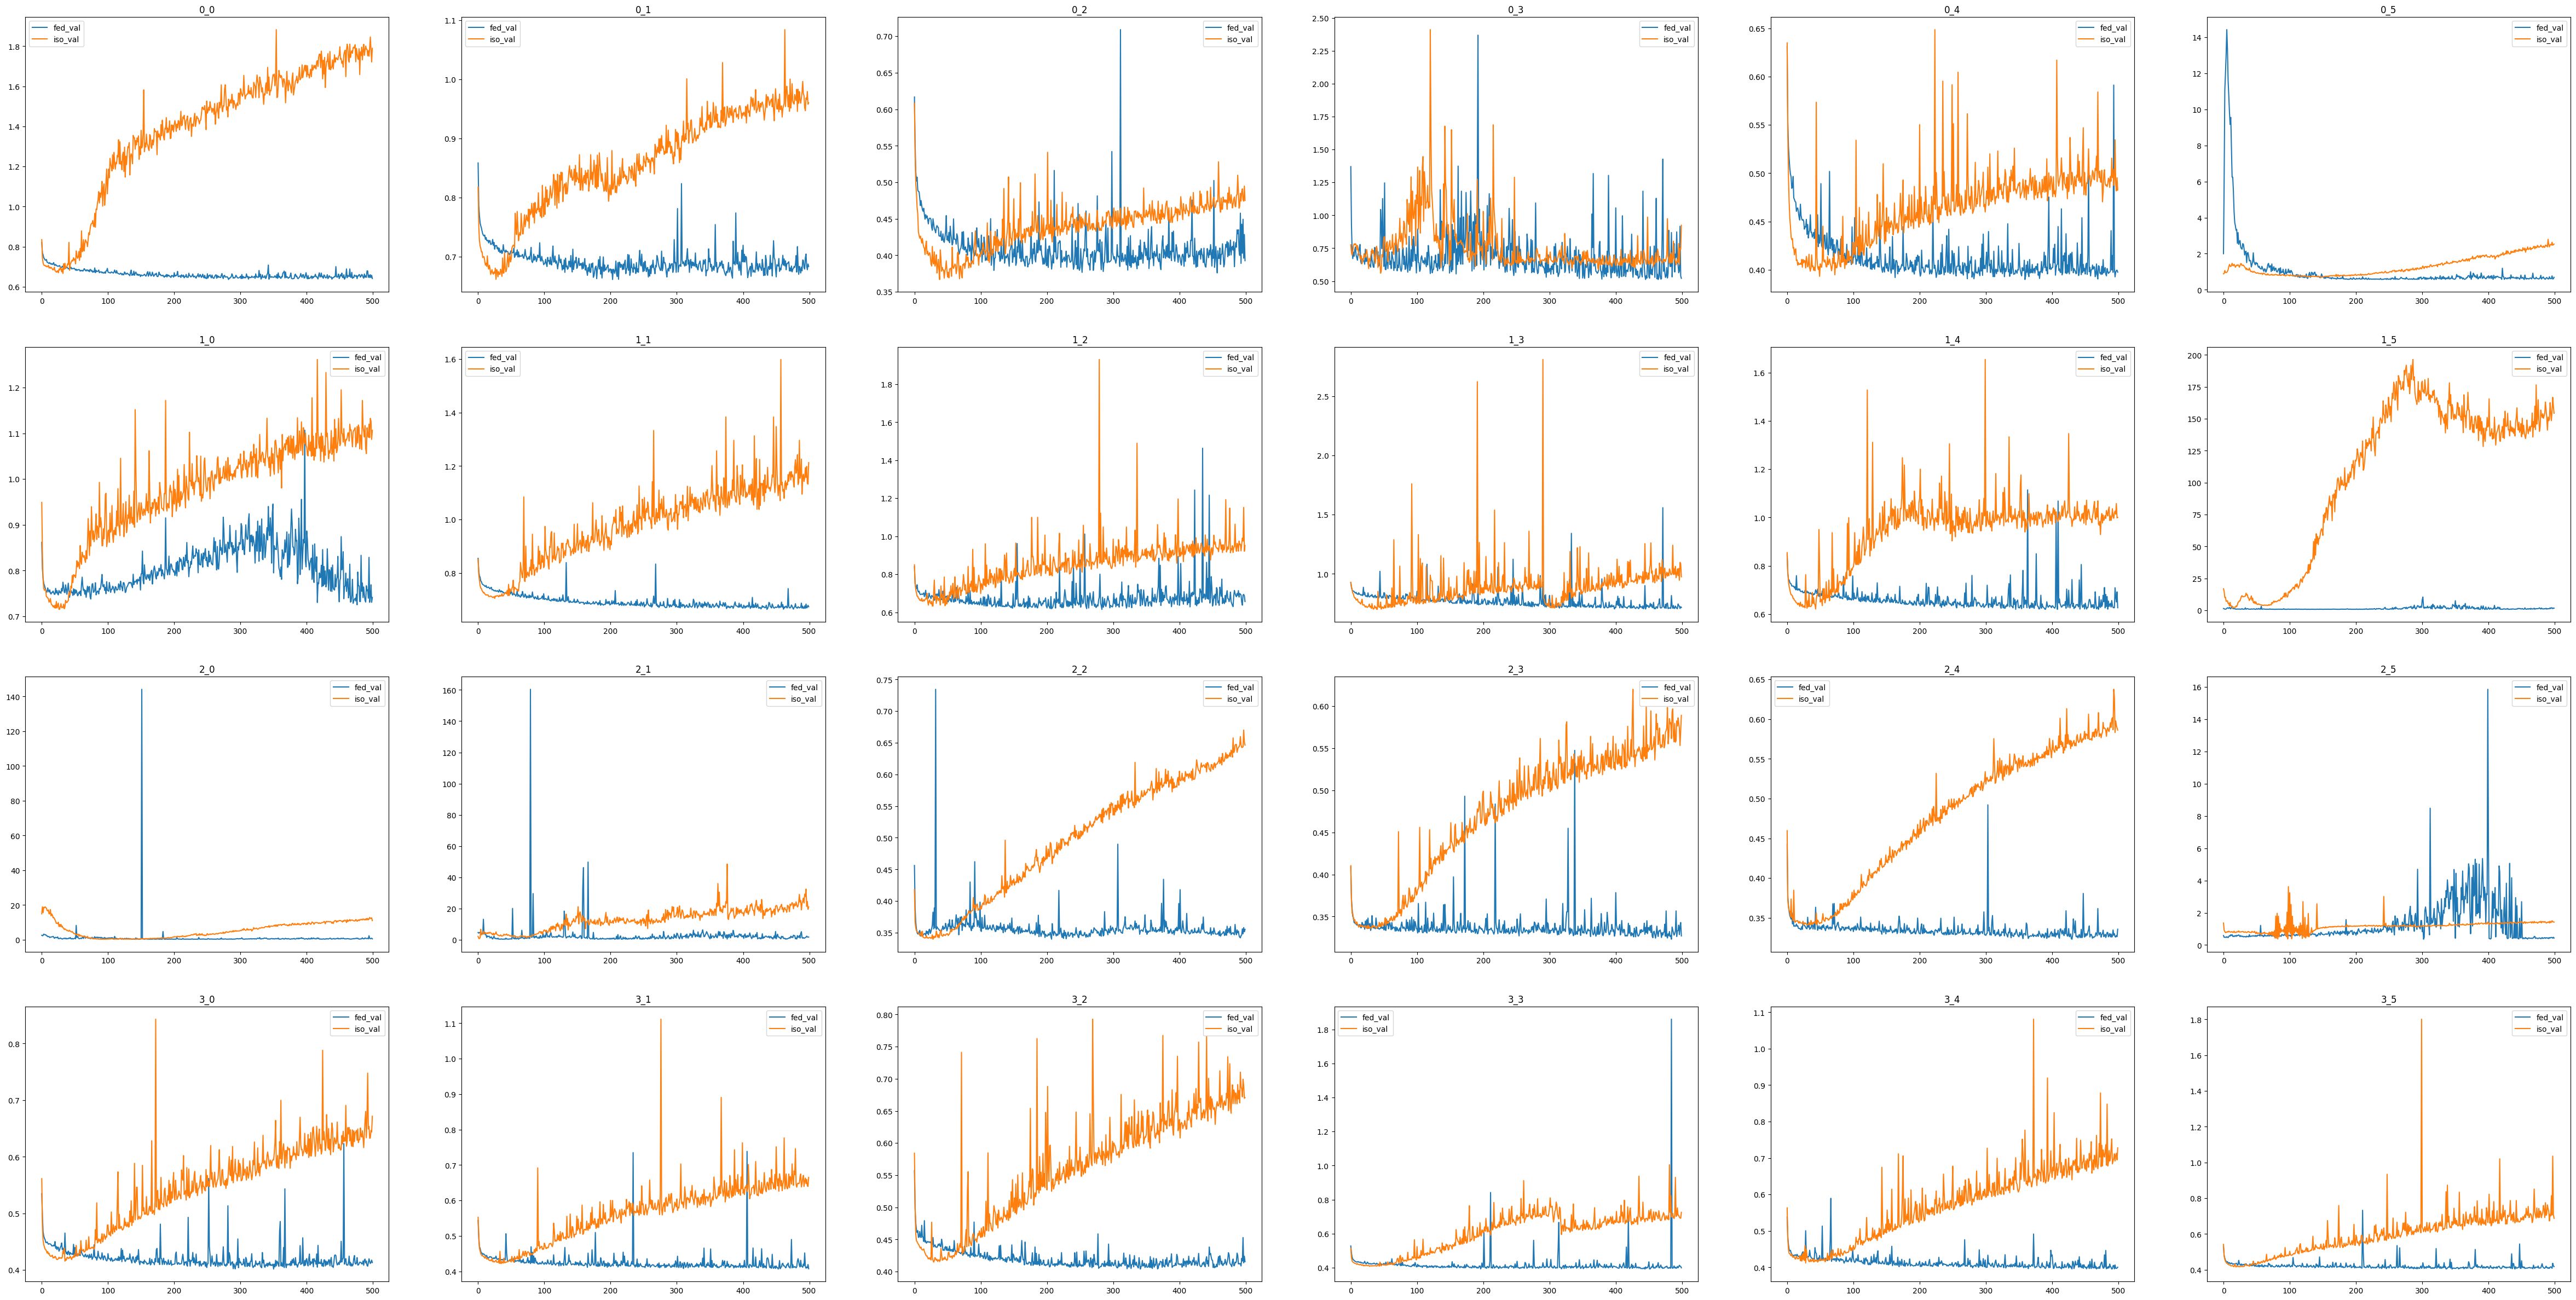

In [21]:
fig,axes = plt.subplots(nrows=4,ncols=6,figsize=(60, 30))
for client in client_ids:
    plot_id = client.split("_")
    fed_losses = fed_learning_all_losses.loc[fed_learning_all_losses['client_id'] == client].reset_index().drop(columns=['index','training_round','client_id','fed_train'])
    fed_losses = fed_losses.rename(columns={"validation_loss": "fed_val"})
    iso_losses = pd.read_csv("losses/batch64_client_"+str(client)+".csv").drop(columns=["iso_train"])
    df = pd.concat([fed_losses, iso_losses], axis=1)
    df.plot(ax=axes[int(plot_id[0])][int(plot_id[1])],title=client)

In [22]:
global_model = ShallowNN(features)
global_model.load_state_dict(torch.load('checkpt/_64_fedl_global.pth'))

<All keys matched successfully>

In [23]:
eval_list = []
for client in client_ids:
    
    val_data_path =  "testpt/"+str(client)+".pt"
    val_set = torch.load(val_data_path)
    val_loader = DataLoader(val_set, batch_size, shuffle = True)
    
    isolated_model_path = "checkpt/isolated/batch64_client_"+str(client)+".pth"
    isolated_model =  ShallowNN(features)
    isolated_model.load_state_dict(torch.load(isolated_model_path))
    
    _, _ , isolated_mae = evaluate(isolated_model, val_loader, loss_fn)
    _, _ , global_mae = evaluate(global_model,val_loader,loss_fn)
    
    eval_dict = {"client_id":client, "isolated_mae": round(isolated_mae, 4), "federated_mae" :round(global_mae, 4)}
    eval_list.append(eval_dict)
    
eval_df = pd.DataFrame.from_dict(eval_list)

<Axes: xlabel='client_id'>

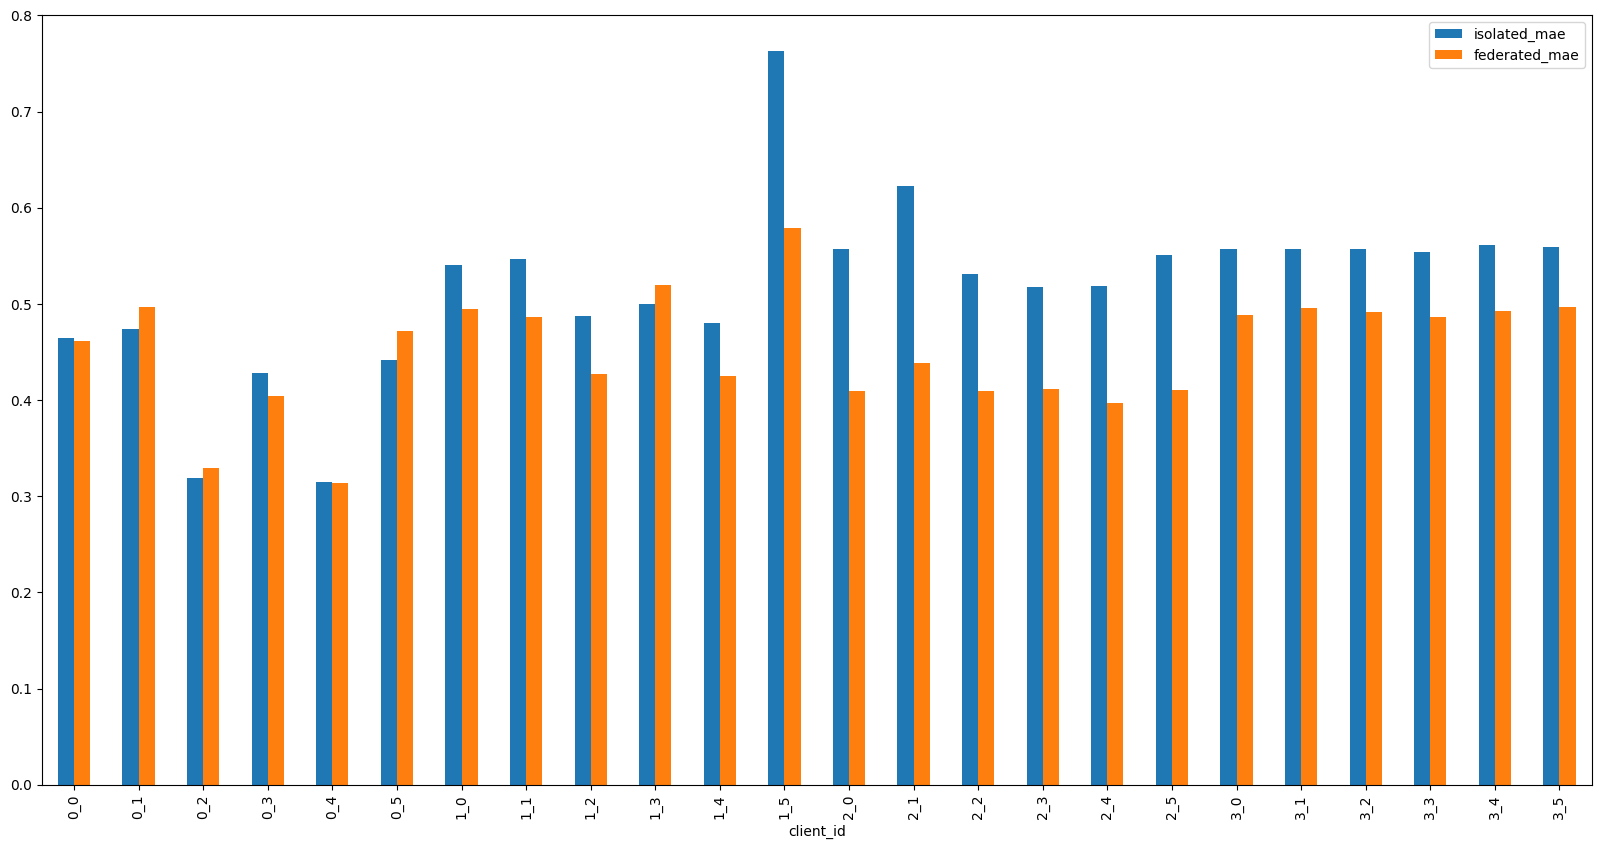

In [24]:
eval_df.plot.bar(x="client_id",figsize=(20, 10))

In [27]:
global_model.track_layers["layer_1"].weight.data

tensor([[ 0.0501,  0.0265,  0.0452,  ...,  0.0557, -0.0177, -0.0275],
        [ 0.0549, -0.0163,  0.0038,  ...,  0.0462, -0.0593,  0.0341],
        [-0.0044,  0.0075, -0.0481,  ...,  0.0393,  0.0463, -0.0067],
        ...,
        [ 0.0565,  0.0096, -0.0986,  ..., -0.0587, -0.0217,  0.0844],
        [ 0.0291, -0.0239,  0.0608,  ..., -0.0169,  0.0037,  0.0200],
        [-0.0063, -0.0411, -0.0527,  ...,  0.0554,  0.0399,  0.0758]])

In [ ]:
hessian_mat, time = calculate_hessian(model2,loss_fn,validation_data_loader)

In [ ]:
convert model.parameter to a tensor

In [ ]:
hessian_mat.shape

In [ ]:
2234/60

In [ ]:
import torch
import time

# Create model
model = torch.nn.Sequential(torch.nn.Linear(1, 100), torch.nn.Tanh(), torch.nn.Linear(100, 1))

# Evaluate some loss on a random dataset
x = torch.rand((1000,1))
y = torch.rand((1000,1))
y_hat = model(x)
loss = ((y_hat - y)**2).mean()

print(loss)

''' Calculate Hessian '''
start = time.time()

# Allocate Hessian size
H = torch.zeros((num_param, num_param))

# Calculate Jacobian w.r.t. model parameters
J = torch.autograd.grad(loss, list(model.parameters()), create_graph=True)
J = torch.cat([e.flatten() for e in J]) # flatten

# Fill in Hessian
for i in range(num_param):
    result = torch.autograd.grad(J[i], list(model.parameters()), retain_graph=True)
    H[i] = torch.cat([r.flatten() for r in result]) # flatten

print(time.time() - start)

In [ ]:


# Get the shape of the model's parameters
model_parameters_shape = np.concatenate([p.data.view(-1).detach().cpu().numpy() for p in global_model.parameters()]).shape

# Sample data and labels (random data for illustration purposes)
inputs = torch.randn(100, input_dim)
labels = torch.randn(100, output_dim)

# Calculate the Hessian-vector product for both models
_, Hvp1 = fmin_l_bfgs_b(loss_and_hvp, x0=model1_parameters, args=(global_model, criterion, inputs, labels))
_, Hvp2 = fmin_l_bfgs_b(loss_and_hvp, x0=model2_parameters, args=(model2, criterion, inputs, labels))

# Compare the Hessian properties (e.g., eigenvalues, eigenvalue distribution, sensitivity analysis, etc.)
# You can use NumPy or other libraries to analyze the Hessian properties.